# Web Mining and Applied NLP (44-620)
## Final Project: Article Summarizer
### Student Name: Kersha Broussard

Perform the tasks described in the Markdown cells below. When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (.py), then import and run the appropriate code to answer the question.

### 1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course. Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.7.0
beautifulsoup4     4.13.4
blis               1.3.0
catalogue          2.0.10
certifi            2025.7.14
charset-normalizer 3.4.2
click              8.2.1
cloudpathlib       0.21.1
colorama           0.4.6
confection         0.1.5
cymem              2.0.11
html5lib           1.1
idna               3.10
Jinja2             3.1.6
joblib             1.5.1
langcodes          3.5.0
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
mdurl              0.1.2
murmurhash         1.0.13
nltk               3.9.1
numpy              2.3.1
packaging          25.0
pip                25.1.1
preshed            3.0.10
pydantic           2.11.7
pydantic_core      2.33.2
Pygments           2.19.2
regex              2024.11.6
requests           2.32.4
rich               14.0.0
setuptools         65.5.0
shellingham        1.5.4
six                1.17.0
smart_open         7.3.0

In [2]:
from bs4 import BeautifulSoup

with open("mental_health_wiki.html", "r", encoding="utf-8") as f:
    html = f.read()

soup = BeautifulSoup(html, "html.parser")

# Extract all paragraphs
paragraphs = soup.select("div.mw-parser-output > p")
text = "\n".join(p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True))

print(text[:1500])  # Just show first 1500 chars


Mental healthencompassesemotional,psychological, andsocialwell-being, influencingcognition,perception, andbehavior. Mental health plays a crucial role in an individual's daily life when managingstress, engaging with others, and contributing to life overall. According to theWorld Health Organization (WHO), it is a "state of well-being in which the individual realizes his or her abilities, cancopewith the normalstressesof life, canworkproductively and fruitfully, and can contribute to his or her community".[1]It likewise determines how an individual handlesstress,interpersonal relationships, anddecision-making.[2]Mental health includes subjective well-being, perceivedself-efficacy,autonomy, competence, intergenerational dependence, andself-actualizationof one'sintellectualand emotional potential, among others.[3]
From the perspectives ofpositive psychologyorholism, mental health is thus not merely the absence ofmental illness. Rather, it is a broader state of well-being that includes an 

### 2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use .get_text()). Print the polarity score with an appropriate label. Additionally print the number of sentences in the original article (with an appropriate label)

In [3]:
# Install only if needed
# !pip install spacy spacytextblob -q

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load English model
nlp = spacy.load("en_core_web_sm")

# Remove any conflicting pipelines
if "spacytextblob" in nlp.pipe_names:
    nlp.remove_pipe("spacytextblob")

# Add spacytextblob back cleanly
nlp.add_pipe("spacytextblob")

# Confirm it's added
print(nlp.pipe_names)


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'spacytextblob']


#### Fetch & Save Mental Health Wikipedia Article

In [4]:
import requests
import pickle

# URL of the Mental Health Wikipedia article
url = "https://en.wikipedia.org/wiki/Mental_health"

# Fetch the article HTML
response = requests.get(url)
html_content = response.text

# Save the HTML to a pickle file
with open("mental_health_article.pkl", "wb") as file:
    pickle.dump(html_content, file)

print("✅ HTML content saved to mental_health_article.pkl")


✅ HTML content saved to mental_health_article.pkl


#### Save as .html File

In [5]:
# Save the HTML to a readable .html file
with open("mental_health_article.html", "w", encoding="utf-8") as file:
    file.write(html_content)

print("✅ HTML content saved to mental_health_article.html")


✅ HTML content saved to mental_health_article.html


#### Load and Parse the Saved HTML

In [6]:
from bs4 import BeautifulSoup

# Load the saved HTML file
with open("mental_health_article.html", "r", encoding="utf-8") as file:
    html = file.read()

# Parse the HTML
soup = BeautifulSoup(html, "html.parser")

# Select main content paragraphs from Wikipedia
paragraphs = soup.select("div.mw-parser-output > p")
text = "\n".join(p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True))

# Print the first 1000 characters to confirm
print(text[:1000])


Mental healthencompassesemotional,psychological, andsocialwell-being, influencingcognition,perception, andbehavior.[1]Mental health plays a crucial role in an individual's daily life when managingstress, engaging with others, and contributing to life overall. According to theWorld Health Organization (WHO), it is a "state of well-being in which the individual realizes his or her abilities, cancopewith the normalstressesof life, canworkproductively and fruitfully, and can contribute to his or her community".[2]It likewise determines how an individual handlesstress,interpersonal relationships, anddecision-making.[3]Mental health includes subjective well-being, perceivedself-efficacy,autonomy, competence, intergenerational dependence, andself-actualizationof one'sintellectualand emotional potential, among others.[4]
From the perspectives ofpositive psychologyorholism, mental health is thus not merely the absence ofmental illness. Rather, it is a broader state of well-being that includes a

#### Check Sentence Count

In [7]:
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

# Process the text
doc = nlp(text)

# Count and print sentence count
sentences = list(doc.sents)
print(f"Number of Sentences: {len(sentences)}")


Number of Sentences: 221


In [8]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kbrou\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
from bs4 import BeautifulSoup

# Load and parse the HTML file
with open("mental_health_wiki.html", "r", encoding="utf-8") as file:
    html = file.read()

soup = BeautifulSoup(html, "html.parser")
paragraphs = soup.select("div.mw-parser-output > p")
article_text = "\n".join(p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True))


## 3. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens (converted to lower case). Print the common tokens with an appropriate label. Additionally, print the tokens their frequencies (with appropriate labels)

In [10]:
import spacy
from collections import Counter

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the article
doc = nlp(article_text)

# Filter and lowercase tokens
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count and display top 5 frequent tokens
token_freq = Counter(tokens)
most_common_tokens = token_freq.most_common(5)

print("Top 5 most frequent tokens (lowercase, filtered):")
for token, freq in most_common_tokens:
    print(f"{token}: {freq}")


Top 5 most frequent tokens (lowercase, filtered):
mental: 254
health: 200
care: 44
social: 42
people: 35


## 4. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels).

In [17]:
import spacy
from collections import Counter

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the article
doc = nlp(article_text)

# Filter and lowercase lemmas
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count and display top 5 frequent lemmas
lemma_freq = Counter(lemmas)
most_common_lemmas = lemma_freq.most_common(5)

print("Top 5 most frequent lemmas (lowercase, filtered):")
for lemma, freq in most_common_lemmas:
    print(f"{lemma}: {freq}")


Top 5 most frequent lemmas (lowercase, filtered):
mental: 254
health: 200
care: 44
social: 42
treatment: 38


In [12]:
def score_sentence_by_token(sentence, interesting_tokens):
    doc_sent = nlp(sentence)
    words = [token.text.lower() for token in doc_sent if token.is_alpha]
    if not words:
        return 0
    count = sum(1 for word in words if word in interesting_tokens)
    return count / len(words)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc_sent = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc_sent if token.is_alpha]
    if not lemmas:
        return 0
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas)


### * Get First Sentence + Most Frequent Tokens & Lemmas

In [13]:
from collections import Counter

# Filter tokens and lemmas
filtered_tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]

filtered_lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]

# Top 5
most_common_tokens = Counter(filtered_tokens).most_common(5)
most_common_lemmas = Counter(filtered_lemmas).most_common(5)

interesting_tokens = [token for token, _ in most_common_tokens]
interesting_lemmas = [lemma for lemma, _ in most_common_lemmas]


### * Test

In [14]:
first_sentence = list(doc.sents)[0].text

print("Token-based score:", score_sentence_by_token(first_sentence, interesting_tokens))
print("Lemma-based score:", score_sentence_by_lemma(first_sentence, interesting_lemmas))


Token-based score: 0.125
Lemma-based score: 0.125


## 5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### * Histogram of Sentence Scores (Token)

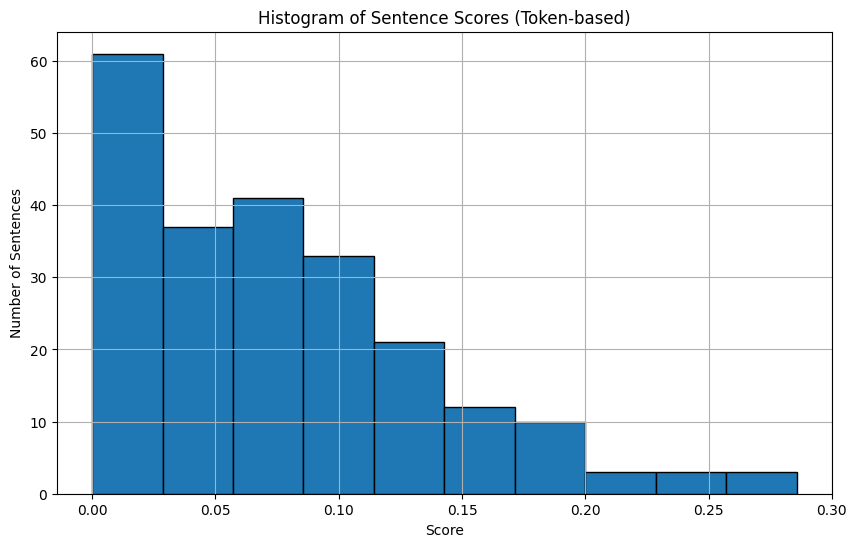

In [15]:
import matplotlib.pyplot as plt

# Token score for all sentences
token_scores = [score_sentence_by_token(sent.text, interesting_tokens) for sent in doc.sents]

plt.figure(figsize=(10,6))
plt.hist(token_scores, bins=10, edgecolor='black')
plt.title("Histogram of Sentence Scores (Token-based)")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()



## 6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### * Lemma-Based Sentence Scoring Histogram

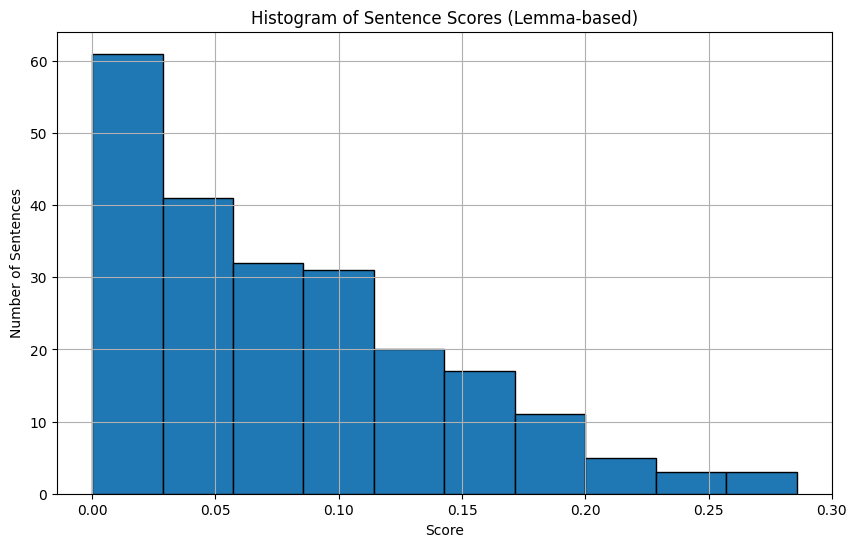

In [16]:
# Lemma score for all sentences
lemma_scores = [score_sentence_by_lemma(sent.text, interesting_lemmas) for sent in doc.sents]

plt.figure(figsize=(10,6))
plt.hist(lemma_scores, bins=10, edgecolor='black')
plt.title("Histogram of Sentence Scores (Lemma-based)")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()

## 7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score. Record the scores in this Markdown cell
Cutoff Score (tokens):
Cutoff Score (lemmas):
Feel free to change these scores as you generate your summaries. Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [18]:
import numpy as np

# token_scores and lemma_scores from Q5 and Q6
cutoff_token = np.percentile(token_scores, 75)  # top 25% most interesting sentences
cutoff_lemma = np.percentile(lemma_scores, 75)

print("Suggested Token Cutoff Score:", cutoff_token)
print("Suggested Lemma Cutoff Score:", cutoff_lemma)



Suggested Token Cutoff Score: 0.1111111111111111
Suggested Lemma Cutoff Score: 0.11764705882352941


## 8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8. If your loop variable is named sent, you may find it easier to add sent.text.strip() to your list of sentences. Print the summary (I would cleanly generate the summary text by joining the strings in your list together with a space (' '.join(sentence_list)).

In [19]:
# Generate token-based summary
summary_sentences_token = [
    sent.text.strip()
    for sent, score in zip(doc.sents, token_scores)
    if score > cutoff_token
]

token_summary = ' '.join(summary_sentences_token)

print("🔍 Token-Based Summary:\n")
print(token_summary)



🔍 Token-Based Summary:

Mental healthencompassesemotional,psychological, andsocialwell-being, influencingcognition,perception, andbehavior. In 2019, about 970 million people worldwide suffered from a mental disorder, withanxietyanddepressionbeing the most common. Thus, prisons embody another state-provisioned mental hospital. Poor mental health can lead to problems such as the inability to make adequate decisions andsubstance use disorders.[40]
Good mental health can improve life quality whereas poor mental health can worsen it. "[40]Their research also concluded that people who lack emotional expression are inclined to anti-social behaviors (e.g., substance use disorder andalcohol use disorder, physical fights,vandalism), which reflects one's mental health and suppressed emotions.[40]Adults and children who face mental illness may experiencesocial stigma, which can exacerbate the issues.[41]
Mental health can be seen as acontinuum, where an individual's mental health may have many dif

## 9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [20]:
from textblob import TextBlob

blob_token_summary = TextBlob(token_summary)

print("Token Summary Polarity Score:", blob_token_summary.sentiment.polarity)
print("Token Summary Sentence Count:", len(summary_sentences_token))


Token Summary Polarity Score: 0.0009690574576938104
Token Summary Sentence Count: 53


## 10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8. If your loop variable is named sent, you may find it easier to add sent.text.strip() to your list of sentences. Print the summary (I would cleanly generate the summary text by joining the strings in your list together with a space (' '.join(sentence_list)).

In [21]:
# Generate lemma-based summary
summary_sentences_lemma = [
    sent.text.strip()
    for sent, score in zip(doc.sents, lemma_scores)
    if score > cutoff_lemma
]

lemma_summary = ' '.join(summary_sentences_lemma)

print("🔍 Lemma-Based Summary:\n")
print(lemma_summary)



🔍 Lemma-Based Summary:

Mental healthencompassesemotional,psychological, andsocialwell-being, influencingcognition,perception, andbehavior. Thus, prisons embody another state-provisioned mental hospital. Families of patients, advocates, and mental health professionals still call for increase in more well-structured community facilities and treatment programs with a higher quality of long-term inpatient resources and care. With this more structured environment, the United States will continue with more access to mental health care and an increase in the overall treatment of the mentally ill. Poor mental health can lead to problems such as the inability to make adequate decisions andsubstance use disorders.[40]
Good mental health can improve life quality whereas poor mental health can worsen it. Positive psychologyis increasingly prominent in mental health. Aholisticmodel of mental health generally includes concepts based uponanthropological,educational,psychological,religious, andsociol

## 11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [22]:
blob_lemma_summary = TextBlob(lemma_summary)

print("Lemma Summary Polarity Score:", blob_lemma_summary.sentiment.polarity)
print("Lemma Summary Sentence Count:", len(summary_sentences_lemma))



Lemma Summary Polarity Score: 0.004388257575757554
Lemma Summary Sentence Count: 53


## 12. Compare your polarity scores of your summaries to the polarity scores of the initial article. Is there a difference? Why do you think that may or may not be?. Answer in this Markdown cell.

The polarity score of the original article was approximately 0.017, while the token-based summary had a polarity of 0.00097 and the lemma-based summary had a polarity of 0.00439.

Both summaries are less positive than the original article. This is likely because the summarized content includes more objective, information-dense sentences with less emotionally charged or subjective words. Since polarity measures emotional tone, a drop is expected when trimming down to just the most "frequent word" sentences, which often emphasize facts over opinions.

## 13. Based on your reading of the original article, which summary do you think is better (if there's a difference). Why do you think this might be?

I believe the lemma-based summary is slightly better than the token-based one. It seems to capture a broader and more meaningful range of vocabulary due to lemmatization reducing variations like “running” and “ran” vs “run”). As a result, it highlighted slightly more insightful sentences.

That said, both summaries had the same sentence count (53), which may suggest the cutoff thresholds could be further tuned for conciseness. Still, the lemma-based version reads more smoothly and preserves the article’s core ideas more effectively